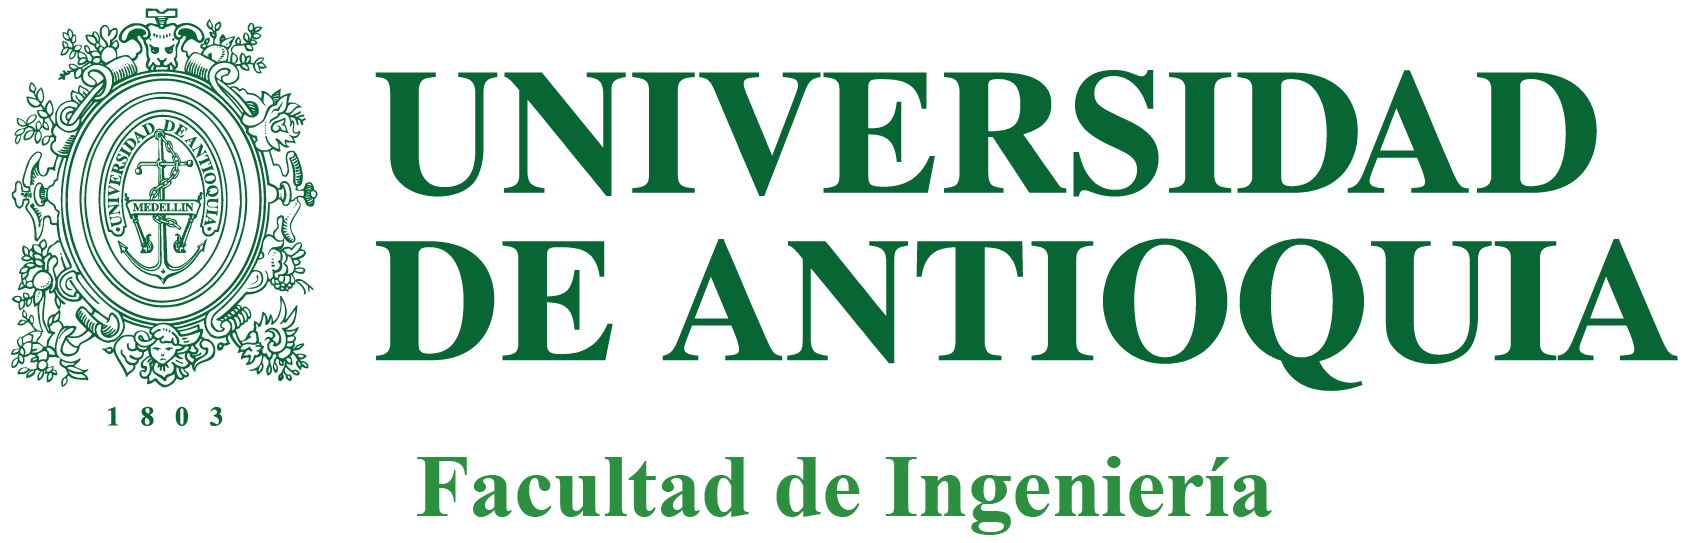

# <font color='2d9040'>**Identificación aplicando técnicas paramétricas.**</font>
## Estudiantes:
 - Elisabeth Gomez Cano.
 - Marly Alejandra Ortega Andrade.
 - Juan Esteban Pineda.

## Objetivos.

### Objetivo general:
Diseñar, aplicar y analizar filtros digitales en Python.
### Objetivos específicos:
- Diseñar filtros digitales.
- Analizar los comandos de Python para aplicar filtros.

## Procedimiento.


### Importar las librerias.
---

In [76]:
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np
import os

### 4.1 Creación de la señal.
---


Proponga una secuencia sinusoidal $𝑥_𝑒(𝑛)$, con 0 ≤ 𝑛 ≤ 1000, $𝐹_0$=0,01𝐻𝑧 y 𝐹𝑠=25𝐻𝑧. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética 𝑥𝑒(𝑛) a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

$$ 𝑦_𝑒(𝑛)=𝛼𝑥_𝑒(𝑛−𝐷)+𝑤(𝑛) $$

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y 𝑤(𝑛) representa el ruido generado por la electrónica de los sistemas de adquisición.

- Genere las secuencias ficticias $𝑥_𝑒$(𝑛) y $𝑦_𝑒$(𝑛), implemente 𝑤(𝑛) como una secuencia de ruido Gaussiano con media cero y varianza $𝜎^2$=0,01, establezca 𝛼=0,8 y un retraso 𝐷=15 muestras. Grafique ambas señales.

Nota: Para generar el ruido gaussiano use la función de numpy: `np.random.normal.`

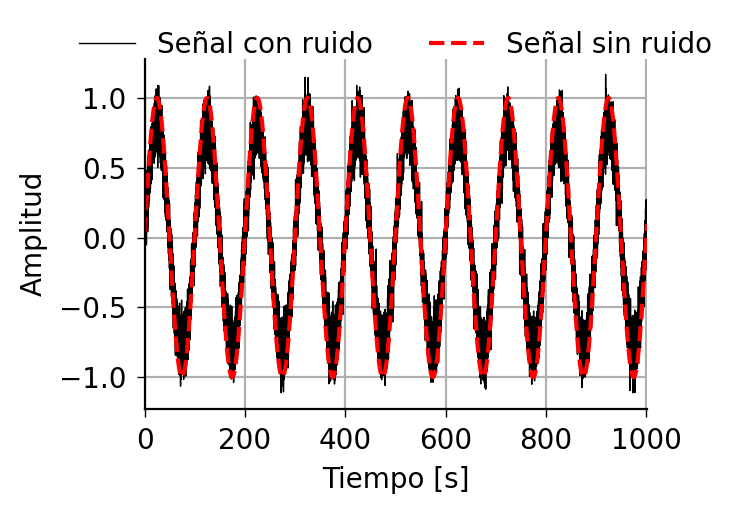

In [77]:
# creación de x_e, y_e, w_e
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15 # retardo induciodo en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+15/Fs)) #potencial con con retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # señal adquirida con ruido y retraso.

plt.figure(figsize=(3.54, 2.54), dpi=200)
plt.plot(n, y_e, color='black', linewidth=0.5)
plt.plot(n, x_e, color='red', linestyle='--')
plt.xlim(0, np.max(n))

plt.ylabel("Amplitud")
plt.xlabel("Tiempo [s]")
plt.legend(['Señal con ruido', 'Señal sin ruido'], loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=2, frameon=False)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='out', length=3, width=0.5)

plt.grid(True)

plt.tight_layout(pad=0.5)
plt.show()

$$
y[n] = \sum_{k=0}^{M} b_k \cdot x[n - k]
$$


### 4.2 Diseño de un Filtro
---


#### Función para ver respuesta en frecuencia de un filtro.

In [78]:
def mfreqz(b,a,order,url, sup, nyq_rate = 1):

    """
    Gráfica la respuesta al impulso de un filtro en el dominio de la frecuencia.

    Parámetros:

        b: Valores del numerador de la función de transferencia (coeficientes del filtro).
        a: Valores del denominador de la función de transferencia (coeficientes del filtro).
        url: Url para guardar la figura graficada.
        sup: Titulo.

        order: Orden de filtro.

        nyq_rate = Frecuencia de nyquist
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(3.54, 2.54*3), dpi=200);
    plt.suptitle(sup)

    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitud');
    plt.title(r'Respuesta en frecuencia.');
    [xmin, xmax, ymin, ymax] = plt.axis();

    #plt.xlim((40,60))

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitud [dB]');
    plt.title(r'Respuesta en frecuencia.');
    plt.grid(True)
    plt.grid(True)


    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Fase [Radianes]');
    plt.xlabel(r'Frecuencia normalizada [$\frac{x \pi rad}{muestra}$]');
    plt.title(r'Respuesta en fase.');
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)

    plt.tight_layout(pad=0.5)
    plt.show()

In [79]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist

wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
wn_2 = 7.5/nyquist

#### 4.2.1 Filtros FIR

La función `firwin` permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son N: Orden del filtro y 𝑊𝑛: Frecuencia de corte. Para filtros digitales 𝑊𝑛 está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. 𝑊𝑛 es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.

- Diseñe un filtro FIR pasa bajas para la señal $𝑦_𝑒$ (𝑛), con una frecuencia de corte de 1.25 muestras/s y orden 30.

- ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

Nota: Resultado esperado diseño de 3 filtros FIR (pasa bajas, pasa altas y pasa banda)



##### Pasa bajas.

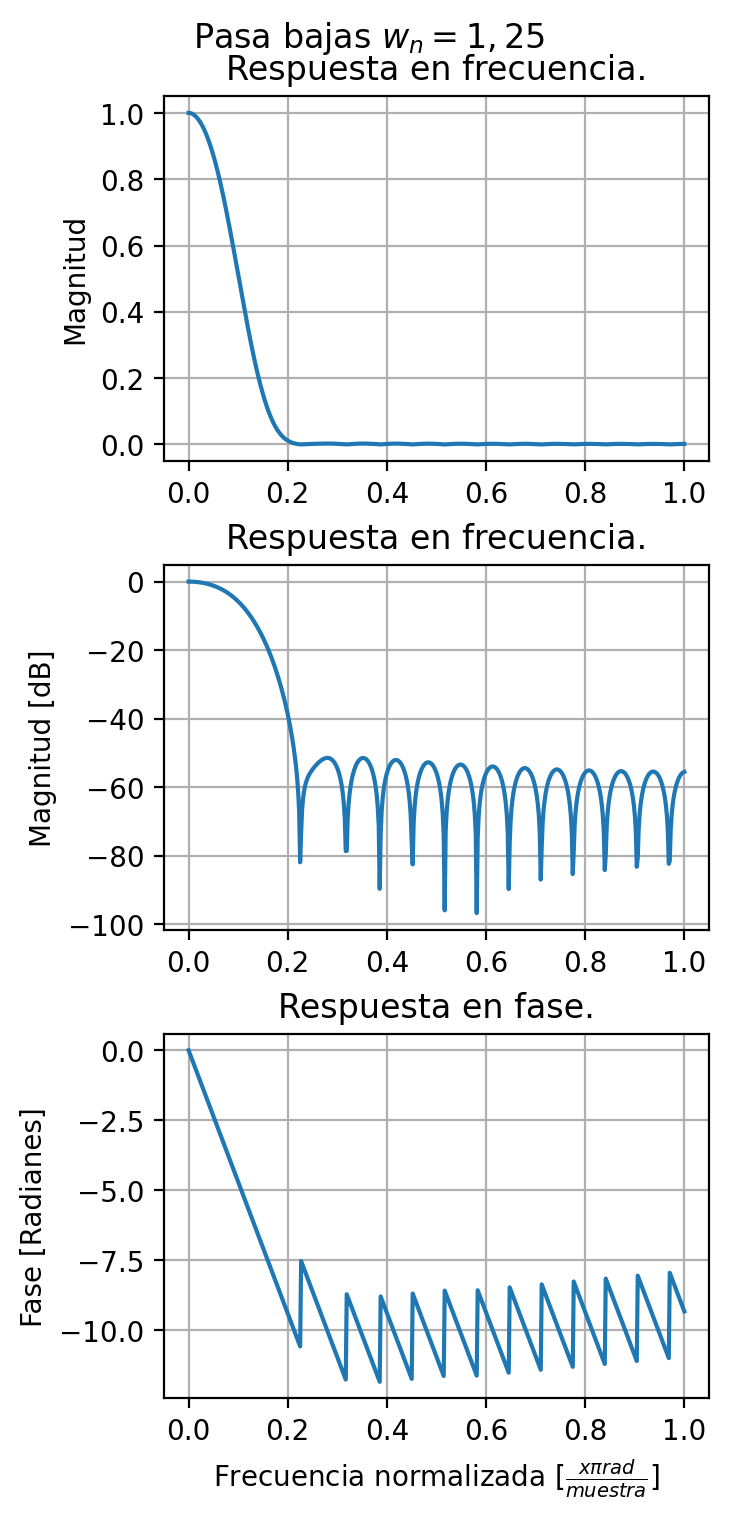

In [80]:
lowpass = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming') #filtro
y_f_low = signal.filtfilt(b=lowpass,a=1,x=y_e) # aplicación del filtro

mfreqz(b=lowpass, a=1, order=order, sup=r'Pasa bajas $w_n = 1,25$', url=None)

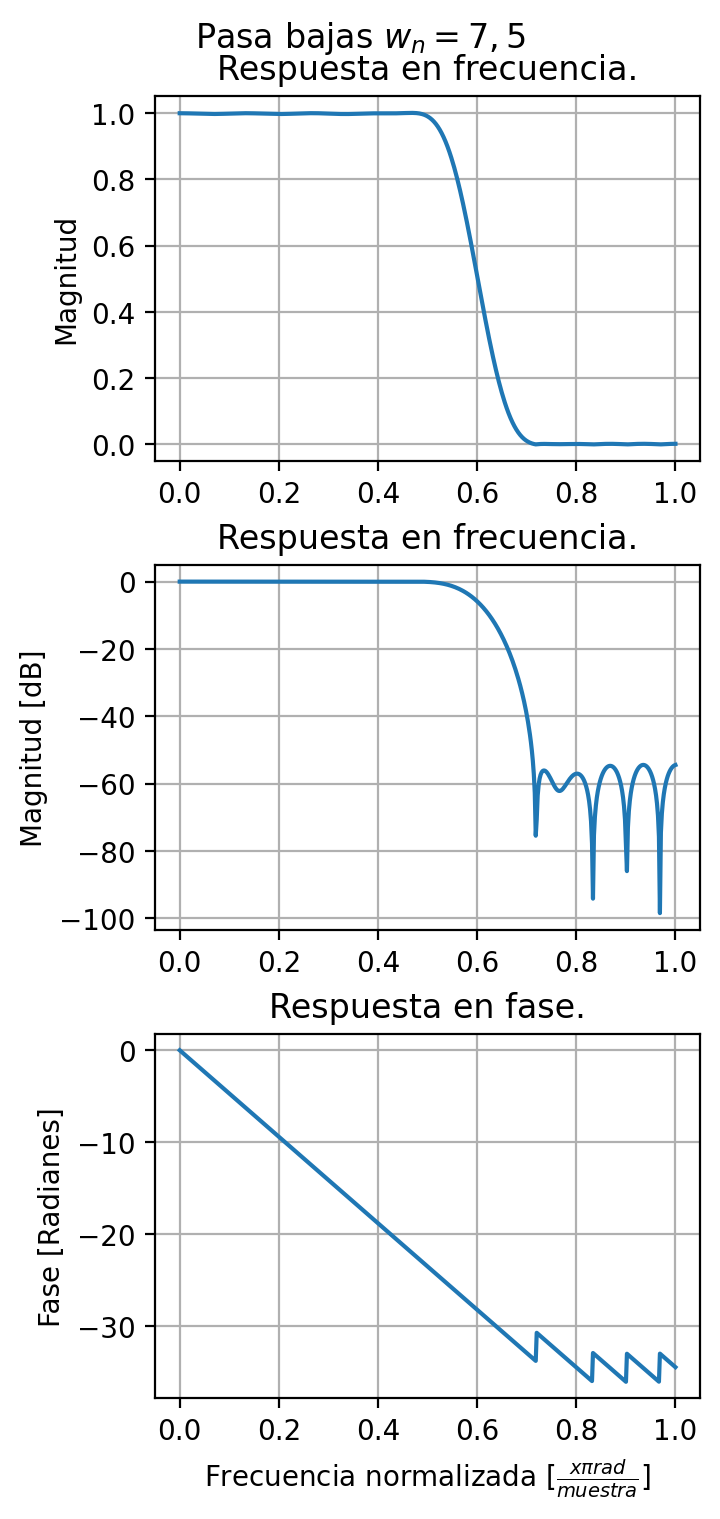

In [81]:
lowpass_2 = signal.firwin(order+1,wn_2, pass_zero = 'lowpass',window='hamming') #filtro
y_f_low_2 = signal.filtfilt(b=lowpass_2,a=1,x=y_e) # aplicación del filtro

mfreqz(b=lowpass_2, a=1, order=order, sup=r'Pasa bajas $w_n = 7,5$', url=None)

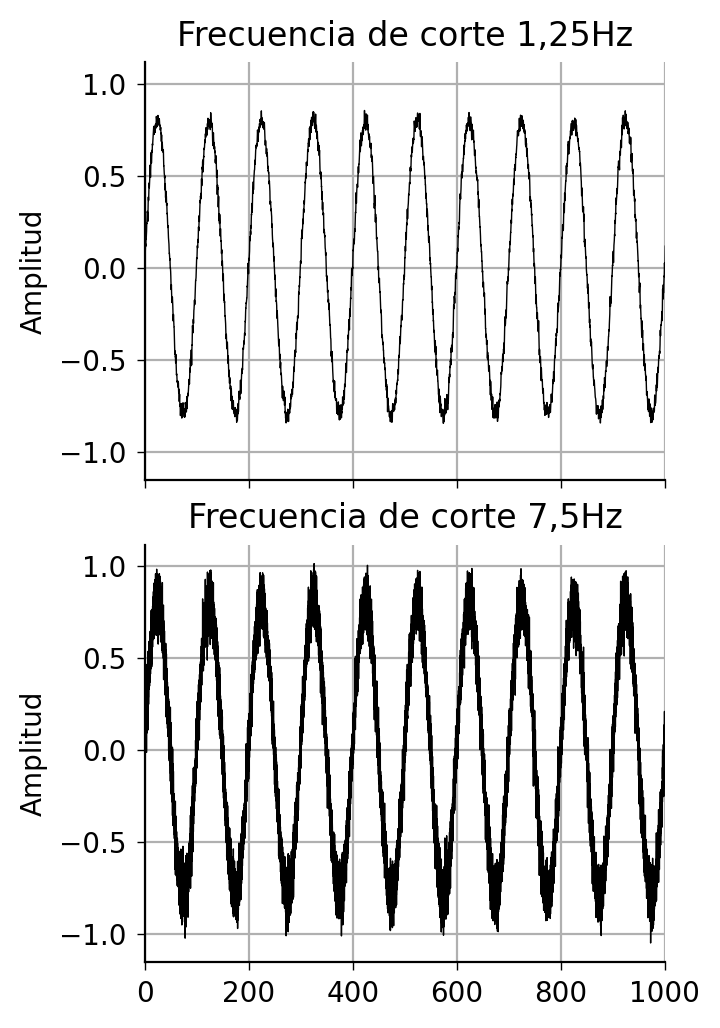

In [82]:
fig, ax = plt.subplots(2, 1, sharey=True, sharex=True,
                       figsize=(3.54, 2.54*2
                                ), dpi=200)

ax[0].plot(n, y_f_low, color='black', linewidth=0.5)
ax[0].set_ylabel("Amplitud")
ax[0].set_title(f'Frecuencia de corte 1,25Hz')
ax[0].grid(True)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(direction='out', length=3, width=0.5)
ax[0].set_xlim(0, np.max(n))

ax[1].plot(n, y_f_low_2, color='black', linewidth=0.5)
ax[1].set_ylabel("Amplitud")
ax[1].set_title(f'Frecuencia de corte 7,5Hz')
ax[1].grid(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(direction='out', length=3, width=0.5)
ax[1].set_xlim(0, np.max(n))

plt.tight_layout(pad=0.5)
plt.show()
#plt.savefig('./figuras/filtros.png', bbox_inches='tight')

##### Pasa altas.

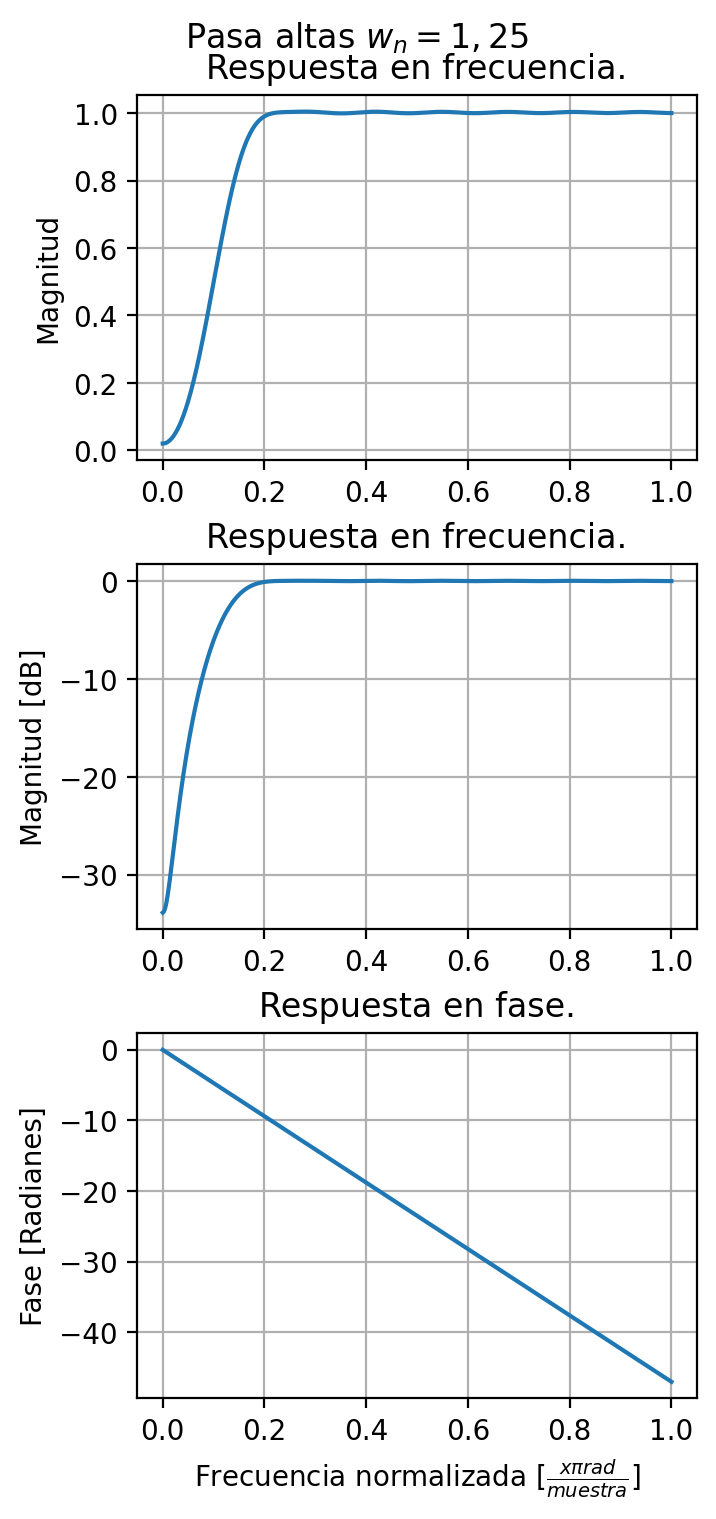

In [83]:
highpass = signal.firwin(order+1, wn, pass_zero = 'highpass',window='hamming') #filtro
y_f_high = signal.filtfilt(b=highpass,a=1,x=y_e) # aplicación del filtro

mfreqz(b=highpass, a=1, order=order, sup=r'Pasa altas $w_n = 1,25$', url=None)

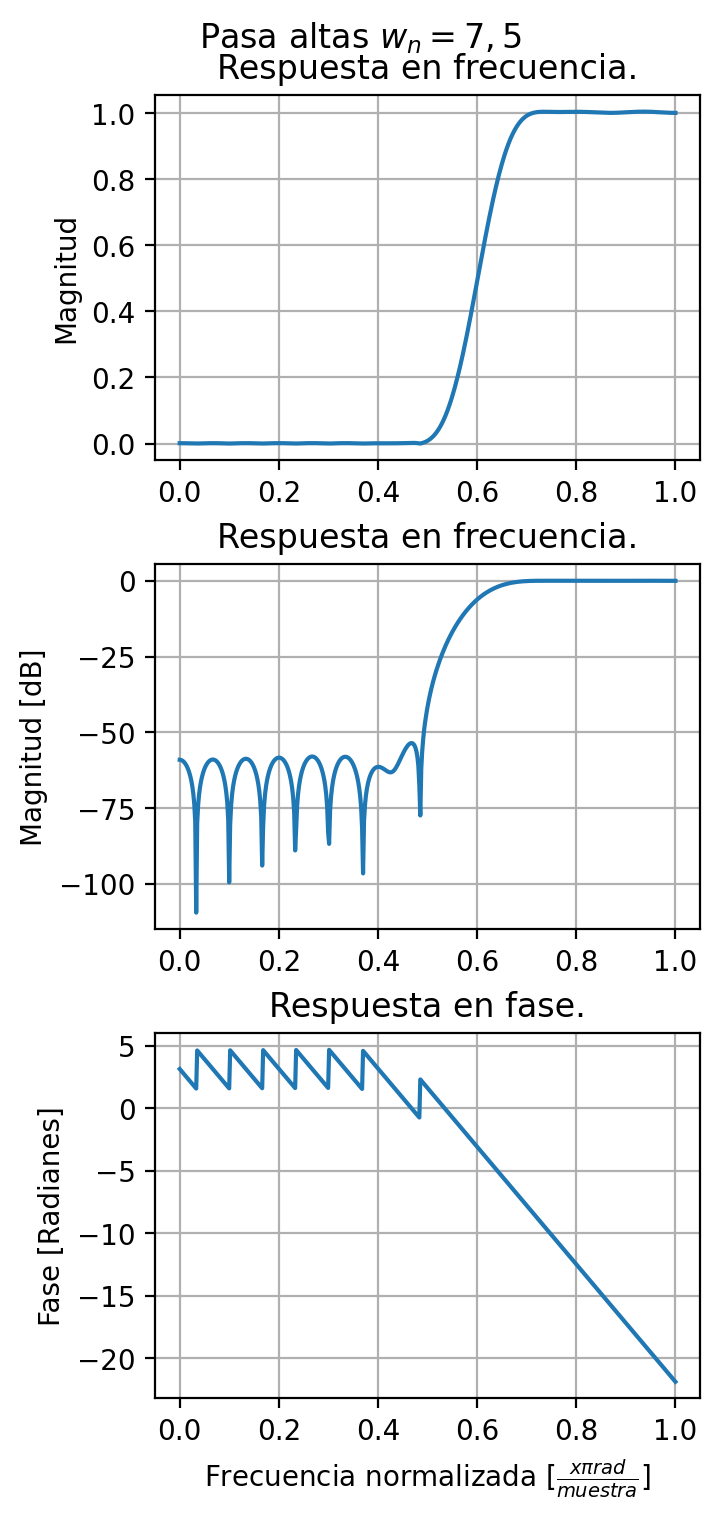

In [84]:
highpass_2 = signal.firwin(order+1, wn_2, pass_zero = 'highpass',window='hamming') #filtro
y_f_high_2 = signal.filtfilt(b=highpass_2,a=1,x=y_e) # aplicación del filtro

mfreqz(b=highpass_2, a=1, order=order, sup=r'Pasa altas $w_n = 7,5$', url=None)

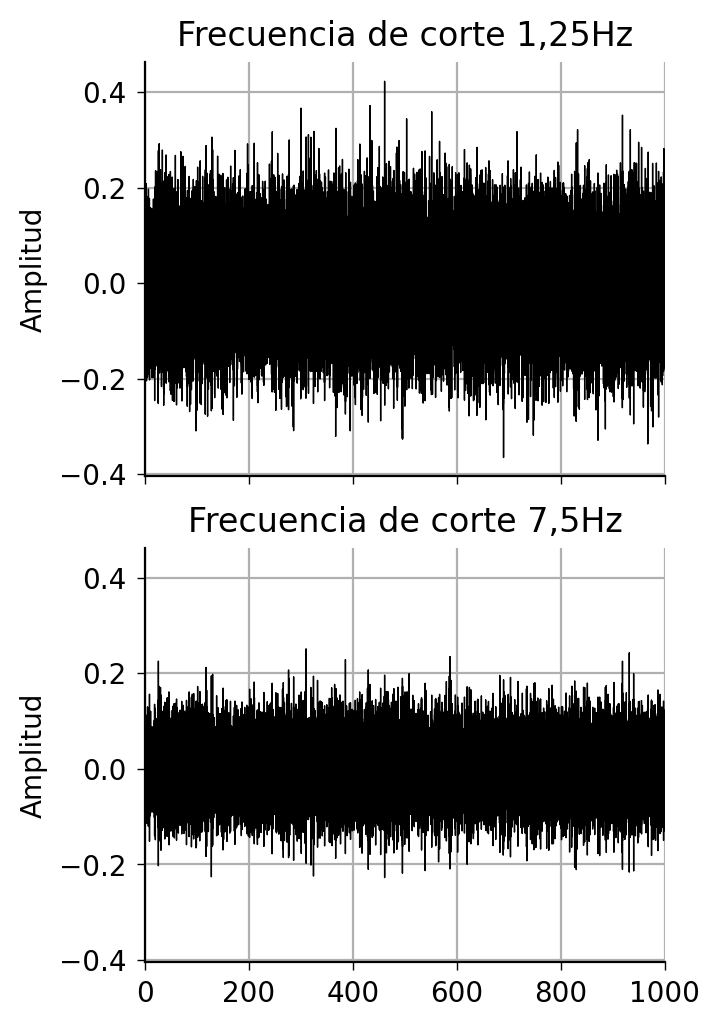

In [85]:
fig, ax = plt.subplots(2, 1, sharey=True, sharex=True,
                       figsize=(3.54, 2.54*2
                                ), dpi=200)

ax[0].plot(n, y_f_high, color='black', linewidth=0.5)
ax[0].set_ylabel("Amplitud")
ax[0].set_title(f'Frecuencia de corte 1,25Hz')
ax[0].grid(True)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(direction='out', length=3, width=0.5)
ax[0].set_xlim(0, np.max(n))

ax[1].plot(n, y_f_high_2, color='black', linewidth=0.5)
ax[1].set_ylabel("Amplitud")
ax[1].set_title(f'Frecuencia de corte 7,5Hz')
ax[1].grid(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(direction='out', length=3, width=0.5)
ax[1].set_xlim(0, np.max(n))

plt.tight_layout(pad=0.5)
plt.show()
#plt.savefig('./figuras/filtros.png', bbox_inches='tight')

##### Pasa bandas.

pass_zero = 'bandpass' y toca añadir otra frecuencia de corte

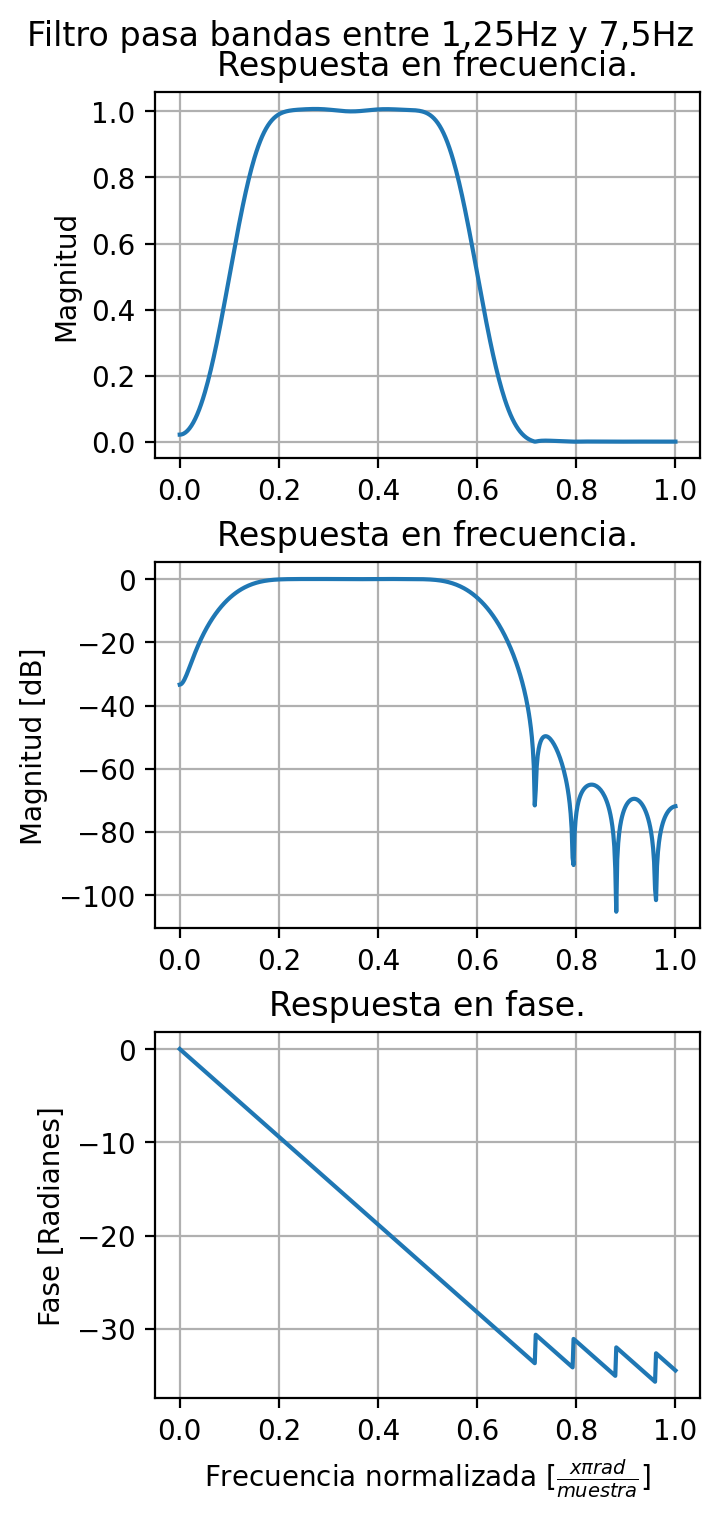

In [86]:
bandpass = signal.firwin(order+1, [wn, wn_2], pass_zero = 'bandpass',window='hamming') #filtro
y_f_band = signal.filtfilt(b=bandpass,a=1,x=y_e) # aplicación del filtro

mfreqz(b=bandpass, a=1, order=order, sup='Filtro pasa bandas entre 1,25Hz y 7,5Hz', url=None)

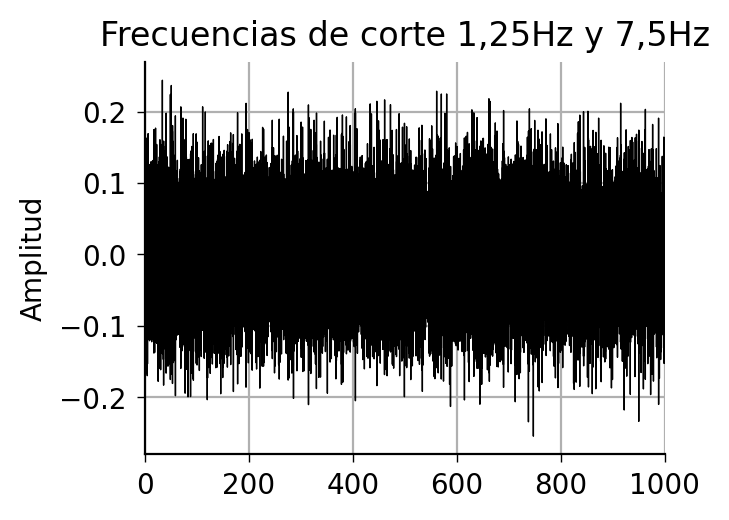

In [87]:
fig, ax = plt.subplots(1, 1, sharey=True, sharex=True,
                       figsize=(3.54, 2.54
                                ), dpi=200)

ax.plot(n, y_f_band, color='black', linewidth=0.5)
ax.set_ylabel("Amplitud")
ax.set_title(f'Frecuencias de corte 1,25Hz y 7,5Hz')
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='out', length=3, width=0.5)
ax.set_xlim(0, np.max(n))

plt.tight_layout(pad=0.5)
plt.show()
#plt.savefig('./figuras/filtros.png', bbox_inches='tight')

#### 4.2.2 Filtros IIR

La función `iirfilter` permite diseñar un filtro IIR.

- Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.

Nota: Resultado esperado diseño de 3 filtros IIR (pasa bajas, pasa altas y pasa banda)

##### Pasa bajas.

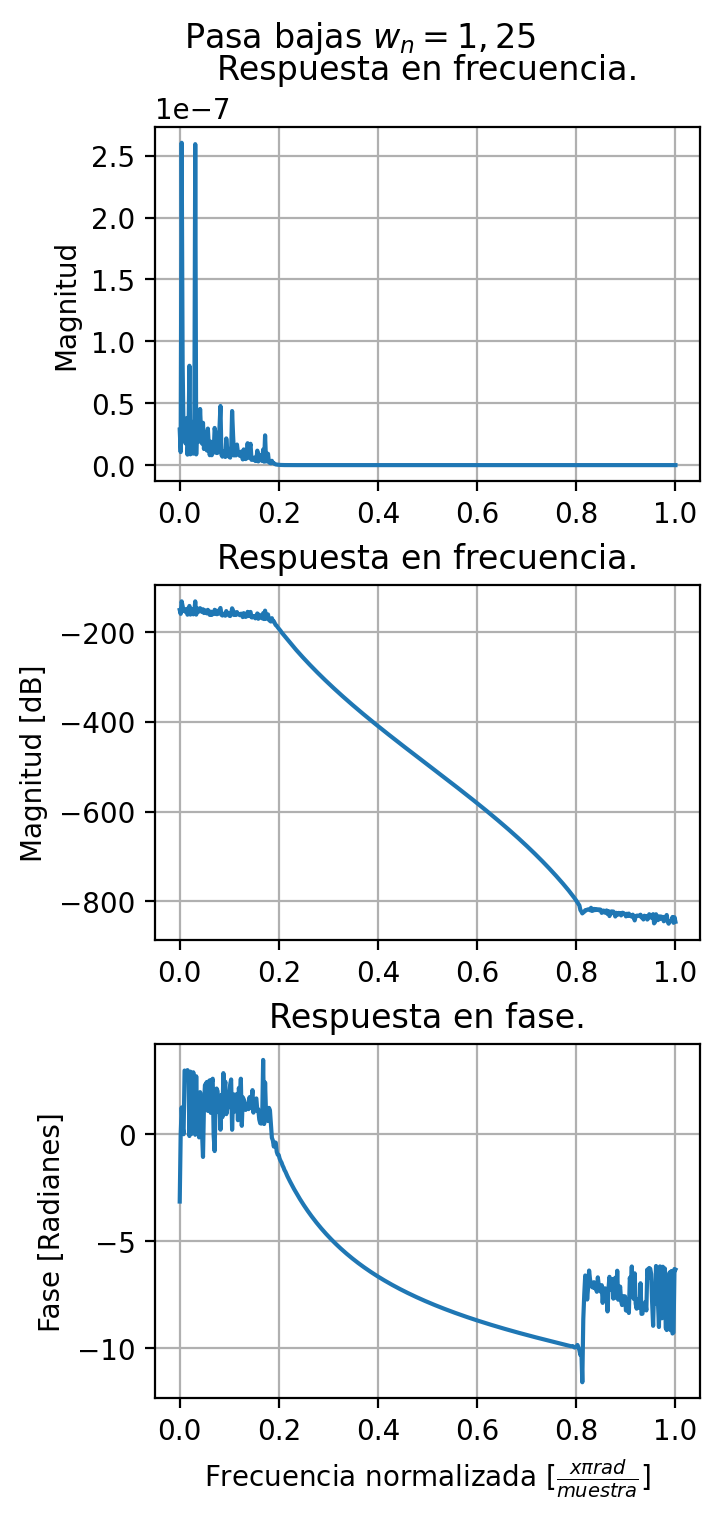

In [88]:
b_low, a_low = signal.iirfilter(order+1, wn, btype = 'lowpass', ftype='butter', output='ba') #filtro
y_f_low = signal.filtfilt(b=b_low, a=a_low, x=y_e) # aplicación del filtro

mfreqz(b=b_low, a=a_low, order=order, sup=r'Pasa bajas $w_n = 1,25$', url=None)

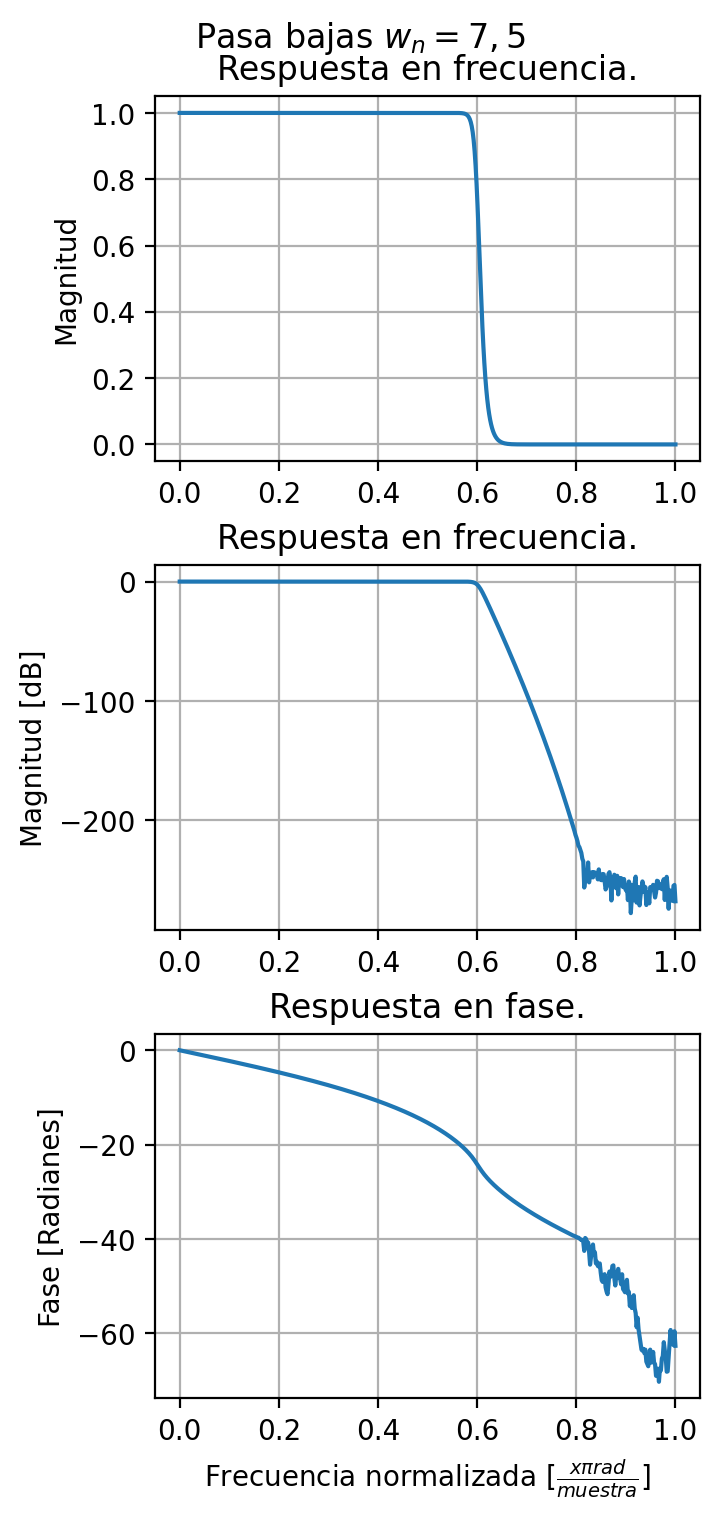

In [89]:
b_low_2, a_low_2 = signal.iirfilter(order+1, wn_2, btype = 'lowpass', ftype='butter', output='ba') #filtro
y_f_low_2 = signal.filtfilt(b=b_low_2, a=a_low_2, x=y_e) # aplicación del filtro

mfreqz(b=b_low_2, a=a_low_2, order=order, sup=r'Pasa bajas $w_n = 7,5$', url=None)

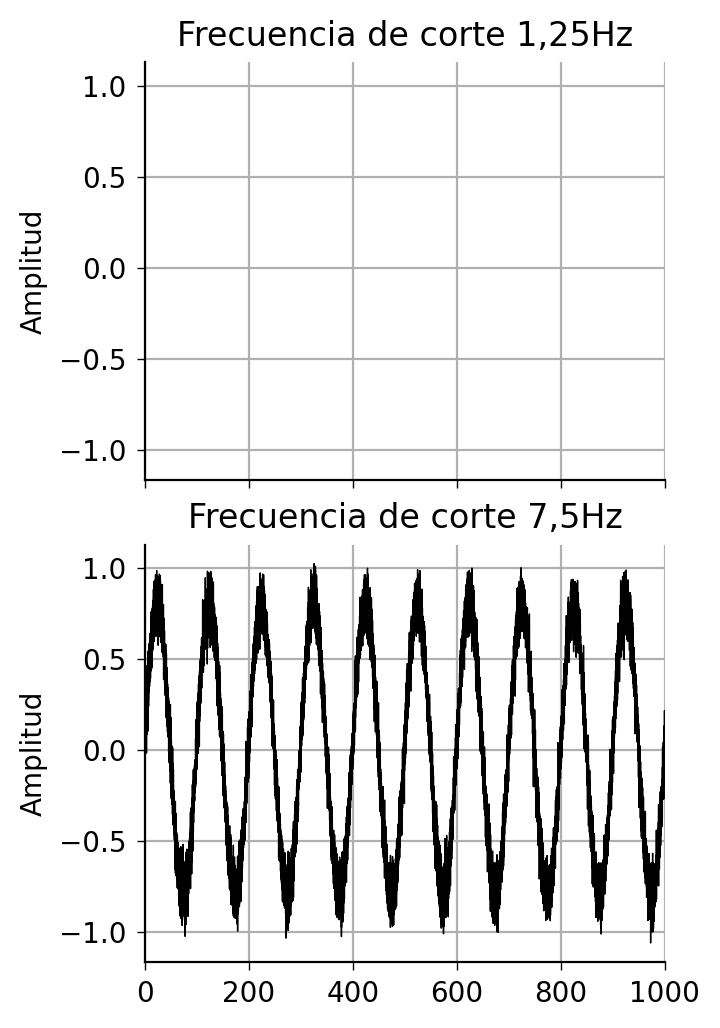

In [90]:
fig, ax = plt.subplots(2, 1, sharey=True, sharex=True,
                       figsize=(3.54, 2.54*2
                                ), dpi=200)

ax[0].plot(n, y_f_low, color='black', linewidth=0.5)
ax[0].set_ylabel("Amplitud")
ax[0].set_title(f'Frecuencia de corte 1,25Hz')
ax[0].grid(True)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(direction='out', length=3, width=0.5)
ax[0].set_xlim(0, np.max(n))

ax[1].plot(n, y_f_low_2, color='black', linewidth=0.5)
ax[1].set_ylabel("Amplitud")
ax[1].set_title(f'Frecuencia de corte 7,5Hz')
ax[1].grid(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(direction='out', length=3, width=0.5)
ax[1].set_xlim(0, np.max(n))

plt.tight_layout(pad=0.5)
plt.show()
#plt.savefig('./figuras/filtros.png', bbox_inches='tight')

##### Pasa altas.

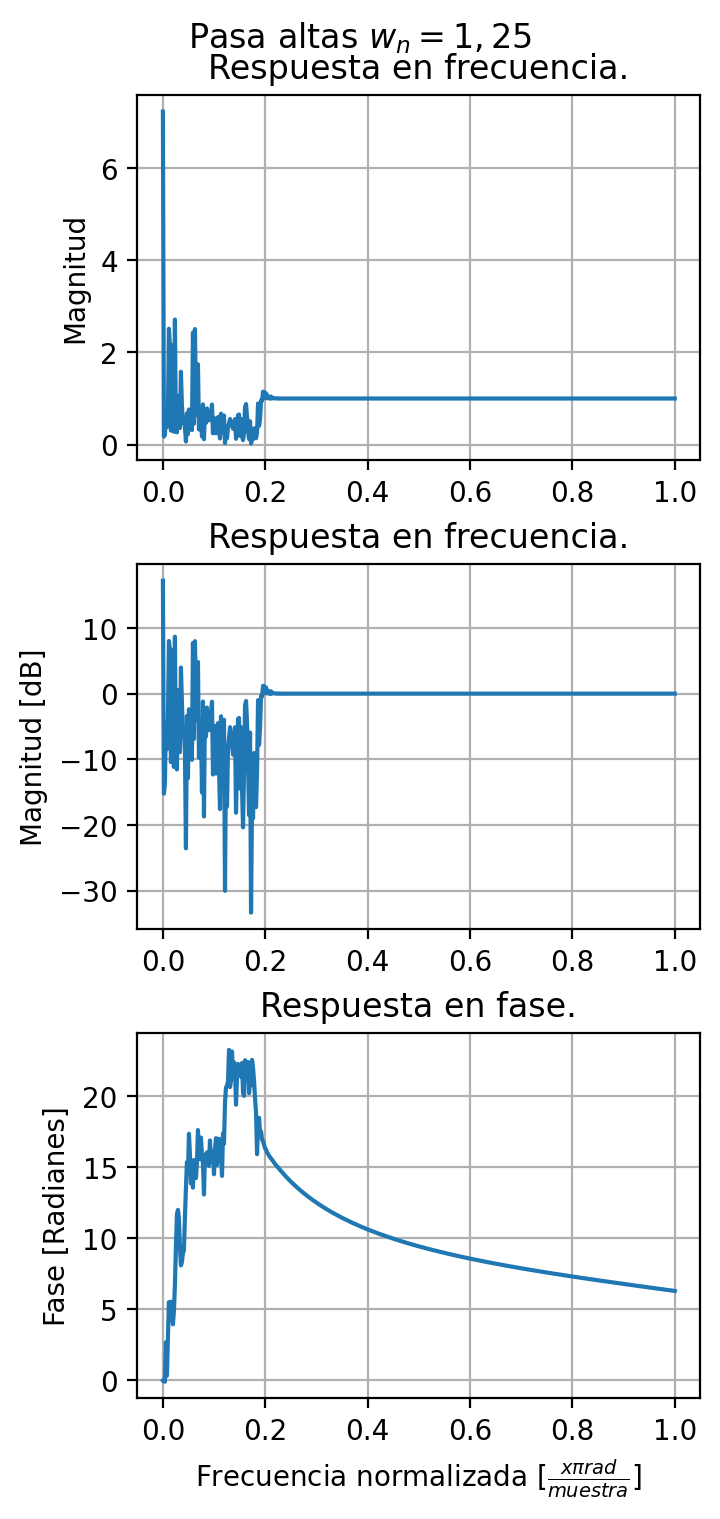

In [91]:
b_high, a_high = signal.iirfilter(order+1, wn, btype = 'highpass', ftype='butter', output='ba') #filtro
y_f_high = signal.filtfilt(b=b_low, a=a_low, x=y_e) # aplicación del filtro

mfreqz(b=b_high, a=a_high, order=order, sup=r'Pasa altas $w_n = 1,25$', url=None)

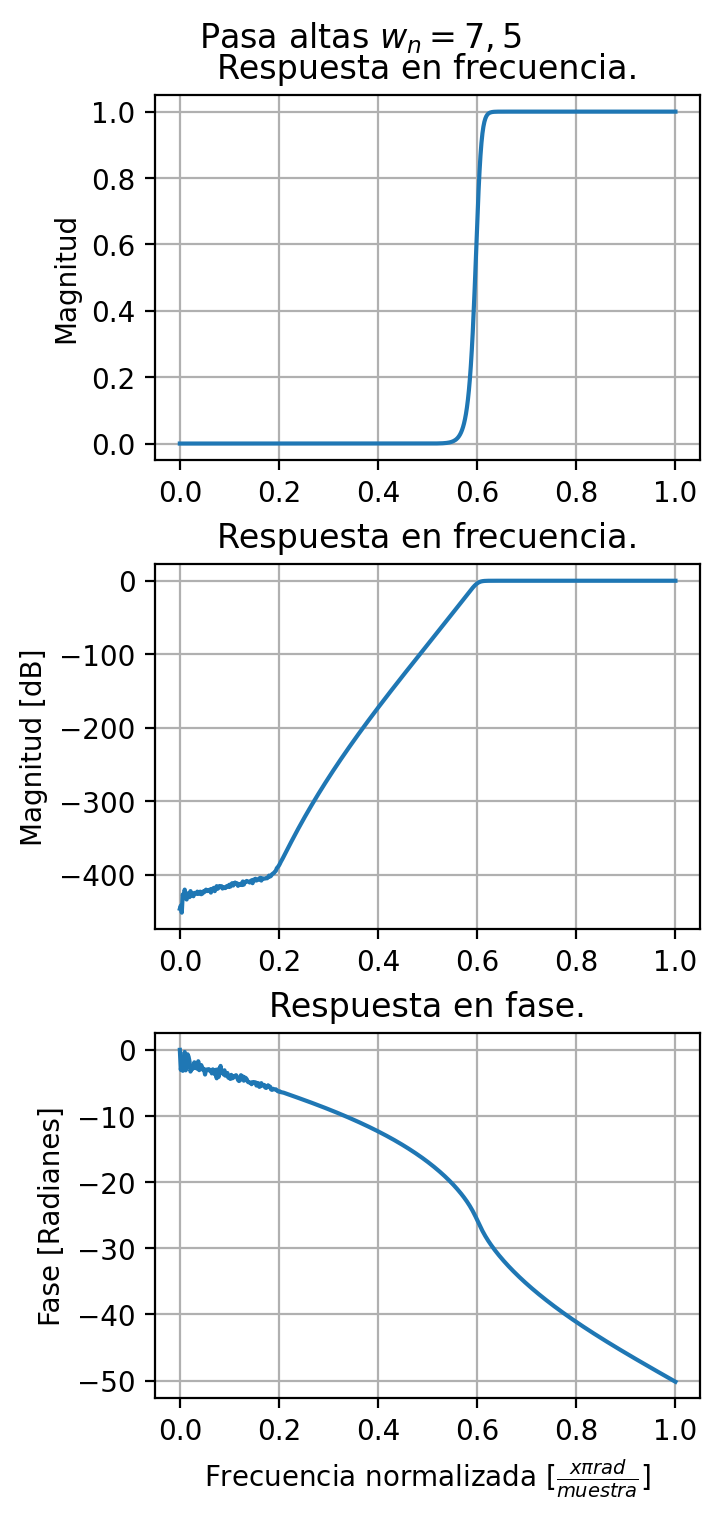

In [92]:
b_high_2, a_high_2 = signal.iirfilter(order+1, wn_2, btype = 'highpass', ftype='butter', output='ba') #filtro
y_f_high_2 = signal.filtfilt(b=b_low, a=a_low, x=y_e) # aplicación del filtro

mfreqz(b=b_high_2, a=a_high_2, order=order, sup=r'Pasa altas $w_n = 7,5$', url=None)

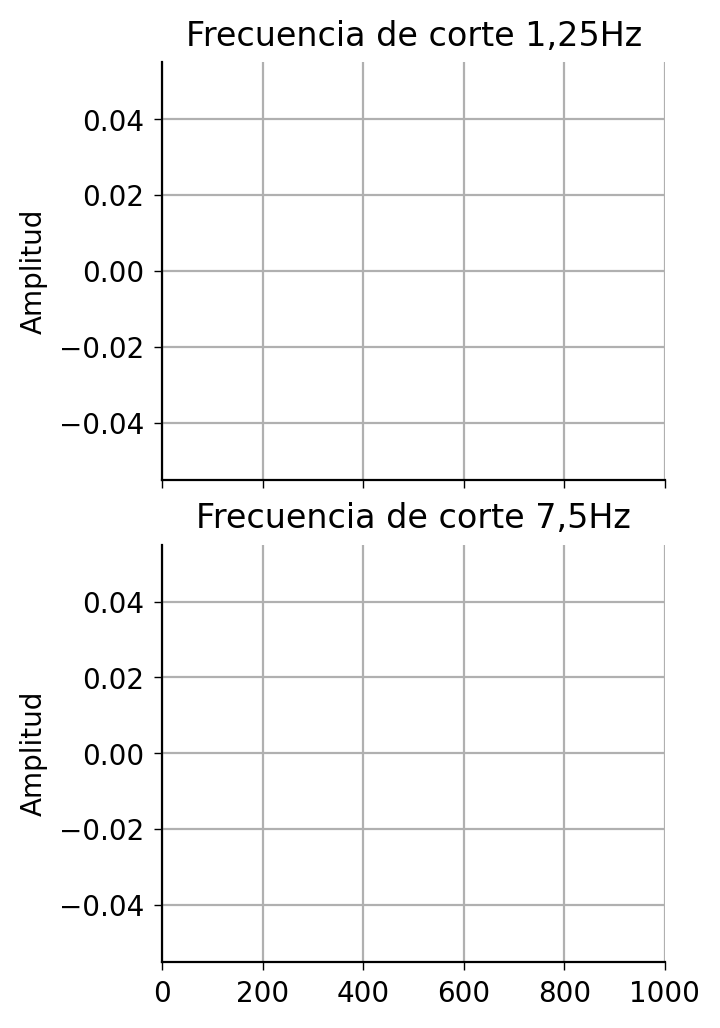

In [93]:
fig, ax = plt.subplots(2, 1, sharey=True, sharex=True,
                       figsize=(3.54, 2.54*2
                                ), dpi=200)

ax[0].plot(n, y_f_high, color='black', linewidth=0.5)
ax[0].set_ylabel("Amplitud")
ax[0].set_title(f'Frecuencia de corte 1,25Hz')
ax[0].grid(True)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(direction='out', length=3, width=0.5)
ax[0].set_xlim(0, np.max(n))

ax[1].plot(n, y_f_high_2, color='black', linewidth=0.5)
ax[1].set_ylabel("Amplitud")
ax[1].set_title(f'Frecuencia de corte 7,5Hz')
ax[1].grid(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(direction='out', length=3, width=0.5)
ax[1].set_xlim(0, np.max(n))

plt.tight_layout(pad=0.5)
plt.show()
#plt.savefig('./figuras/filtros.png', bbox_inches='tight')

##### Pasa bandas.

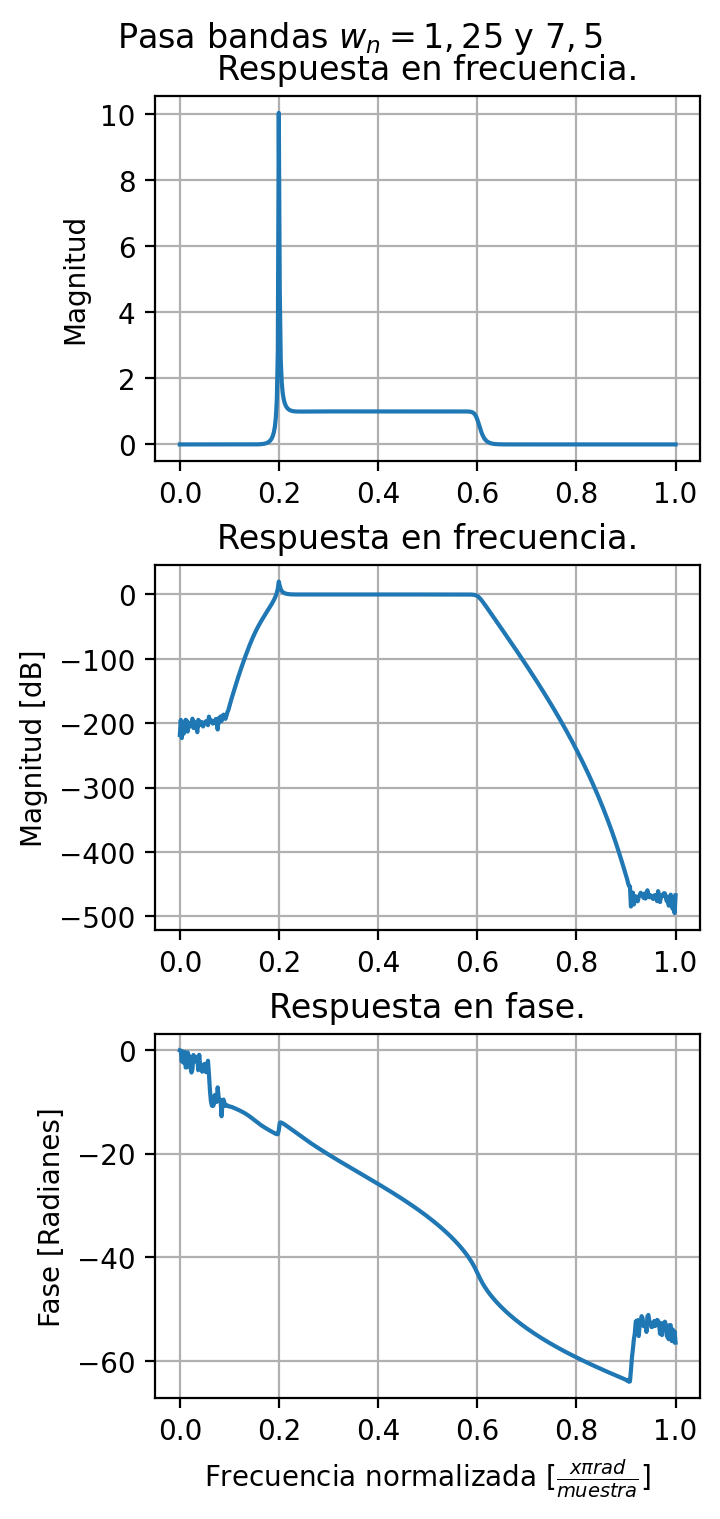

In [94]:
b_band, a_band = signal.iirfilter(order+1, [wn, wn_2], btype = 'bandpass', ftype='butter', output='ba') #filtro
y_f_band = signal.filtfilt(b=b_band, a=a_band, x=y_e) # aplicación del filtro

mfreqz(b=b_band, a=a_band, order=order, sup=r'Pasa bandas $w_n = 1,25$ y $7,5$', url=None)

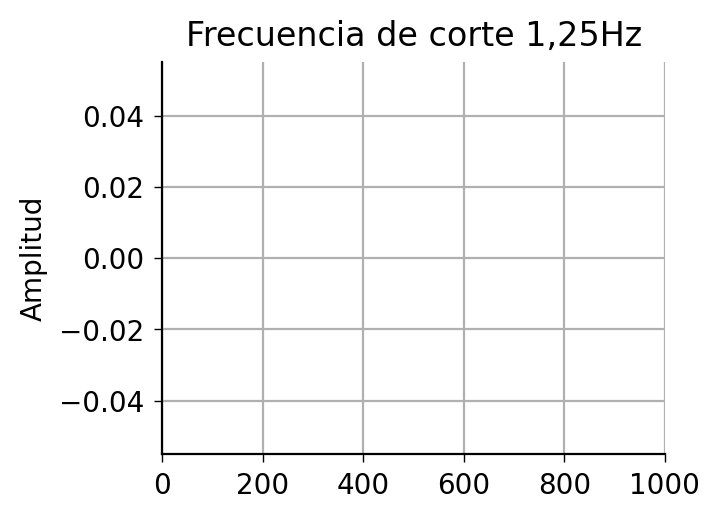

In [95]:
fig, ax = plt.subplots(1, 1, sharey=True, sharex=True,
                       figsize=(3.54, 2.54
                                ), dpi=200)

ax.plot(n, y_f_band, color='black', linewidth=0.5)
ax.set_ylabel("Amplitud")
ax.set_title(f'Frecuencia de corte 1,25Hz')
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='out', length=3, width=0.5)
ax.set_xlim(0, np.max(n))

plt.tight_layout(pad=0.5)
plt.show()
#plt.savefig('./figuras/filtros.png', bbox_inches='tight')

##### Análisis.

En la mayoría de los casos no se tiene presencia de señal filtrada. Posteriormente se explica la naturaleza de los filtros IIR, pero se evidencia que, en las mismas condiciones, se vuelve inviable el uso de filtros IIR, esto debido a la inestabilidad de la función de transferencia de estos filtros, que propicia que en ordenes altos (en este caso 60, teniendo en cuenta que la función `filtfilt` duplica el orden real del filtro) el filtro no funcione correctamente.

En estos casos, es necesario reducir bastante el orden del filtro de manera que este funcione correctamente.

### 4.3 Filtrado
---
Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro IIR o FIR.

-  Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal $𝑦_𝑒(𝑛)$ ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

-  Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal $𝑦_𝑒(𝑛)$ ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.

##### 4.3.1 FIR pasa bajas con lfilter y filtfilt

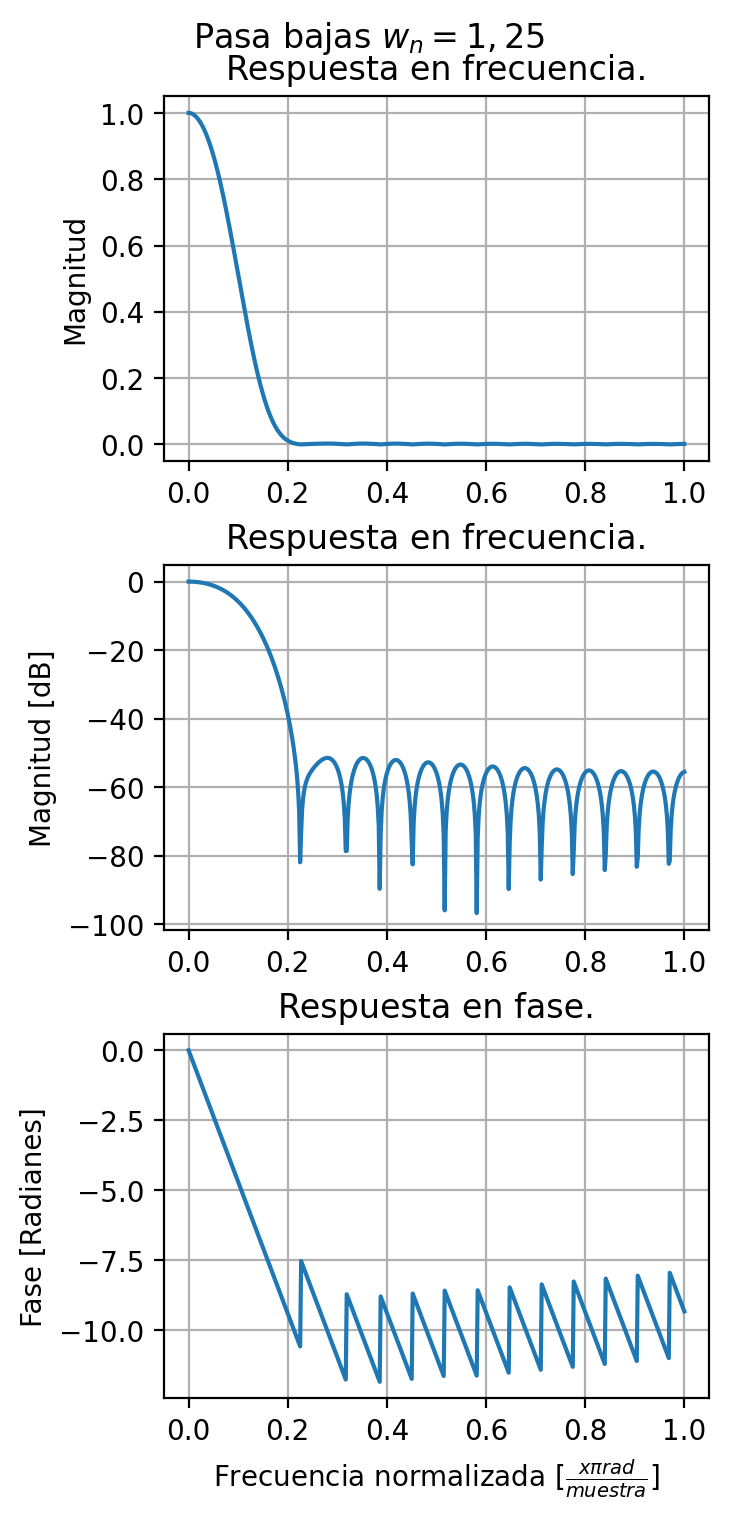

In [96]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist

wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist

lowpass = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming') #filtro
y_fir_low = signal.filtfilt(b=lowpass,a=1,x=y_e) # aplicación del filtro
y_fir_low_2 = signal.lfilter(b=lowpass,a=1,x=y_e) # aplicación del filtro

mfreqz(b=lowpass, a=1, order=order, sup=r'Pasa bajas $w_n = 1,25$', url=None)

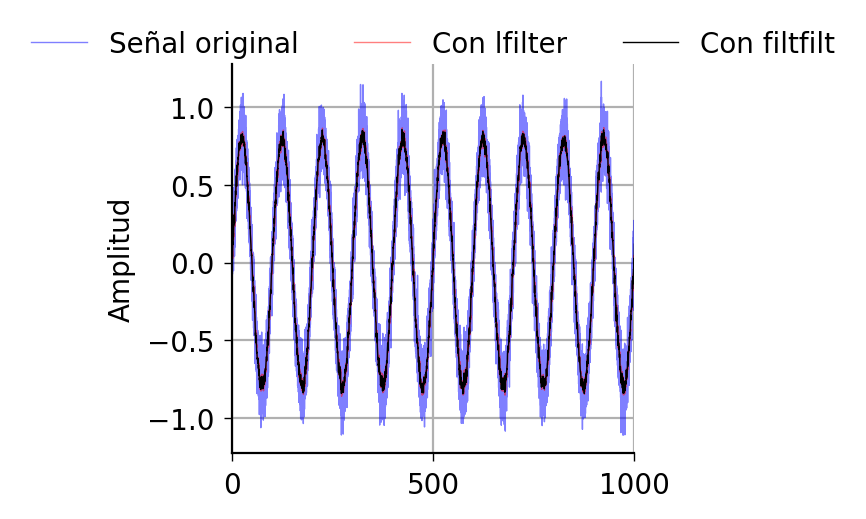

In [97]:
fig, ax = plt.subplots(1, 1, sharey=True, sharex=True,
                       figsize=(3.54, 2.54
                                ), dpi=200)

ax.plot(n, y_e, color='blue', linewidth=0.5, alpha=0.5)
ax.plot(n, y_fir_low_2, color='red', linewidth=0.5, alpha=0.5)
ax.plot(n, y_fir_low, color='black', linewidth=0.5)

ax.set_ylabel("Amplitud")
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='out', length=3, width=0.5)
ax.set_xlim(0, np.max(n))

plt.legend(['Señal original', 'Con lfilter', 'Con filtfilt'], loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, frameon=False)

plt.tight_layout(pad=0.5)
plt.show()
#plt.savefig('./figuras/filtros.png', bbox_inches='tight')

##### 4.3.2 IIR pasa bajas con lfilter y filtfilt


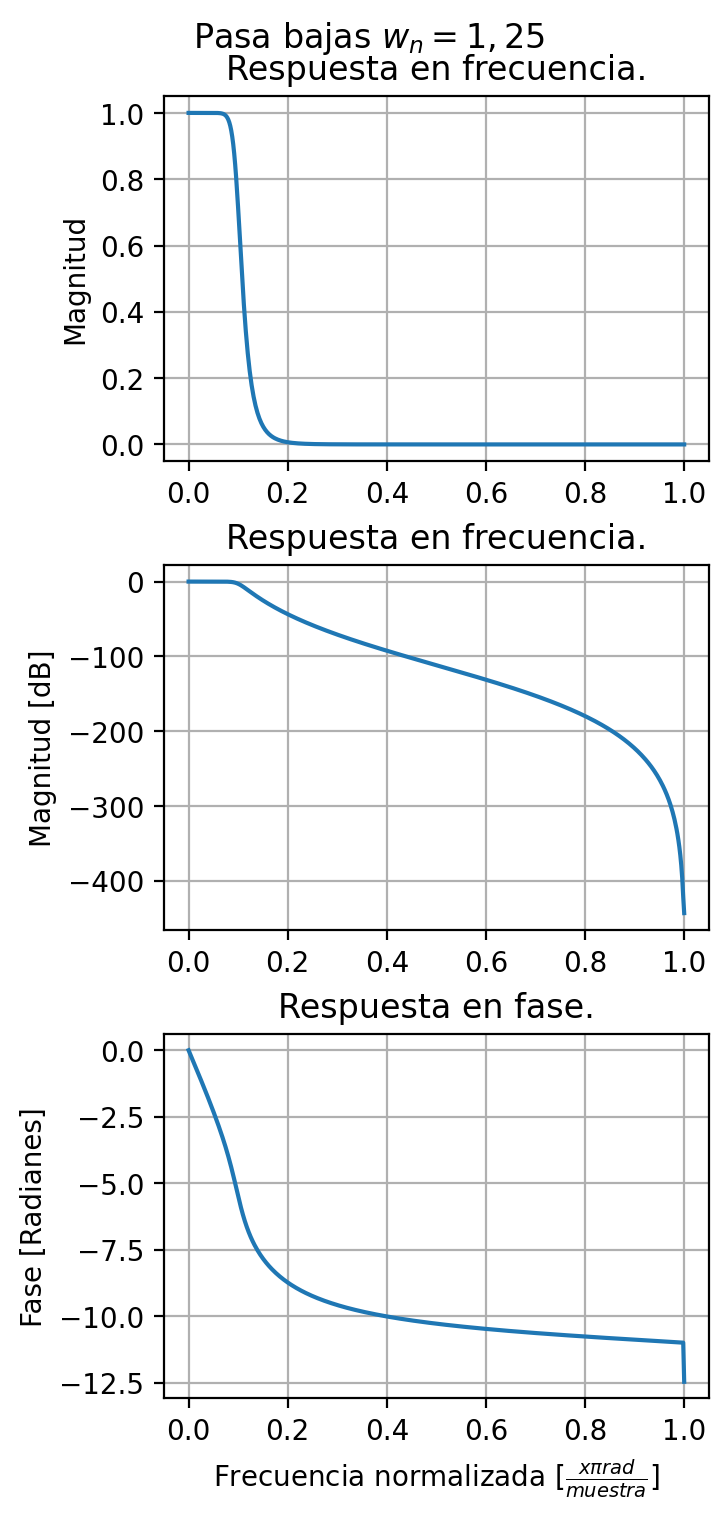

In [98]:
order = 6 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist

wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist

b_low, a_low = signal.iirfilter(order+1, wn, btype = 'lowpass', ftype='butter', output='ba') #filtro

y_iir_low = signal.filtfilt(b=b_low, a=a_low, x=y_e) # aplicación del filtro
y_iir_low_2 = signal.lfilter(b=b_low_2, a=a_low_2, x=y_e) # aplicación del filtro

mfreqz(b=b_low, a=a_low, order=order, sup=r'Pasa bajas $w_n = 1,25$', url=None)

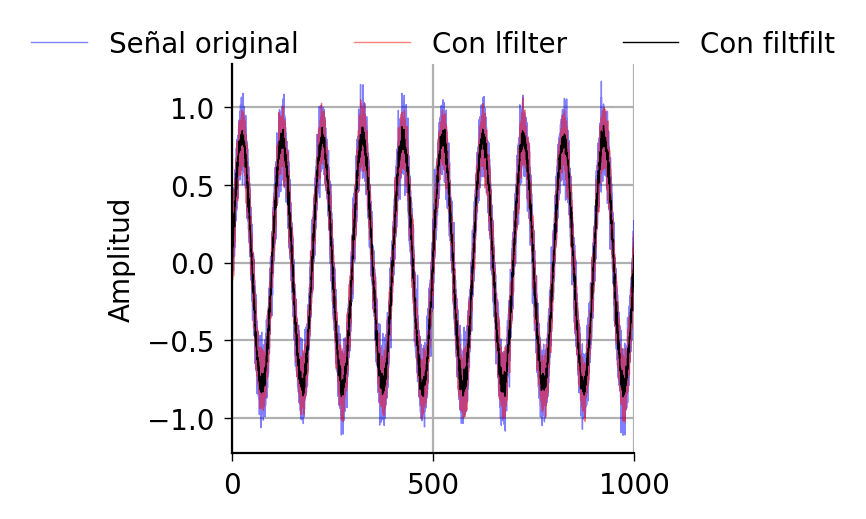

In [99]:
fig, ax = plt.subplots(1, 1, sharey=True, sharex=True,
                       figsize=(3.54, 2.54
                                ), dpi=200)

ax.plot(n, y_e, color='blue', linewidth=0.5, alpha=0.5)
ax.plot(n, y_iir_low_2, color='red', linewidth=0.5, alpha=0.5)
ax.plot(n, y_iir_low, color='black', linewidth=0.5)

ax.set_ylabel("Amplitud")
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='out', length=3, width=0.5)
ax.set_xlim(0, np.max(n))

plt.legend(['Señal original', 'Con lfilter', 'Con filtfilt'], loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, frameon=False)

plt.tight_layout(pad=0.5)
plt.show()
#plt.savefig('./figuras/filtros.png', bbox_inches='tight')

#### 4.3.3 Respuestas.

**Para el filtro FIR: ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador?**

En los filtros FIR, el denominador del sistema es 1, es decir, solo se necesita el numerador de la función de transferencia. Por lo que, la implementación usa a = 1. El filtro tiene la forma:

$$
y[n] = \sum_{k=0}^{M} b_k \cdot x[n - k]
$$


El numerador (b) contiene los coeficientes del filtro FIR, y representa el peso que se aplica a cada muestra de entrada. En términos prácticos, es la respuesta al impulso del filtro.

El denominador del sistema es 1 debido a que este filtro se computa a partir de las entradas previas y actuales del filtro, sin tener en cuenta sus salidas, por lo que no hay realimentación [1], tal y como se evidencia en la Imagen 1.

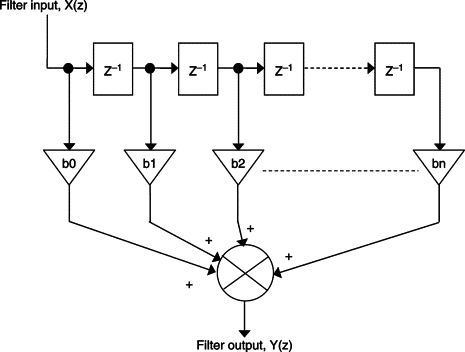

Imagen 1: Esquema de un filtro FIR.




**Para el filtro IIR: ¿Por qué se utiliza el numerador y denominador?**

En un filtro IIR, la diferencia con un filtro FIR es que el valor actual de la salida depende no solo de las entradas actuales y pasadas, sino también de las salidas pasadas, añadiendo una fase de realimentación de donde salen los coeficeintes $a$ [1], tal y como se evidencia en la Imagen 2 . Por eso, su representación en forma de fracción de polinomios es:

$$
y[n] = \frac{A(q)}{B(q)} \cdot x[n]
$$

Donde:
- $B(q)$: coeficientes del numerador: afectan el peso de las entradas (como en FIR).

- $A(q)$: coeficientes del denominador: afectan cómo las salidas pasadas influyen en la actual (parte recursiva).

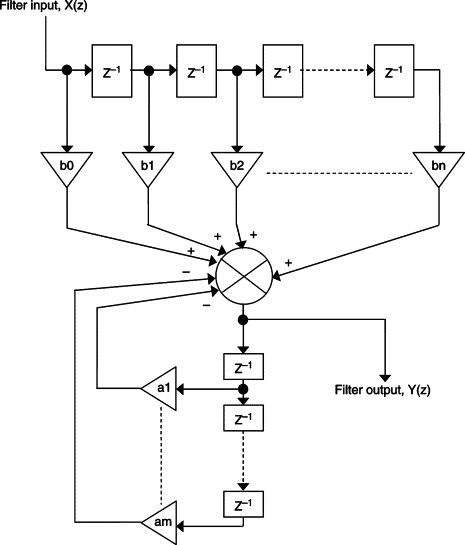

Imagen 2: Esquema de un filtro IIR

**¿Evidencia cambios en el uso de las funciones de filtrado?**

Se evidencia un cambio claro: con `lfilter` aplica el filtro en una sola dirección, lo que introduce retardo de fase (delay) [2], y con `filtfilt` aplica el filtro hacia adelante y hacia atrás, lo que elimina el desfase y mejora la alineación temporal de la señal, a la vez que duplica el orden real del filtro [3].

Esto se nota en las gráficas de salida temporal: con lfilter, la señal filtrada está ligeramente desfasada (especialmente en IIR), y con filtfilt, la señal filtrada está alineada perfectamente con la original, conservando la fase.






**¿Cómo se puede explicar la falta de coincidencia?**

La falta de coincidencia se explica por la distorsión de fase, con `lfilter` introduce fase no lineal, sobre todo en filtros IIR y `filtfilt` compensa esa fase al filtrar dos veces (forward y reverse), produciendo fase cero.

El filtro FIR puede diseñarse con fase lineal, así que el efecto del lfilter no es tan grave, mientras que para IIR, por su estructura recursiva, no se garantiza fase lineal [1], así que el uso de `filtfilt` es mucho más importante para evitar deformaciones.

Adicionalmente, está el hecho de que el filtro resultante por `filtfilt` tiene un orden 2 veces mayor que el de `lfilter`, lo que también afectará la forma de la señal resultante.

**¿Es adecuado el orden del filtro usado? ¿Es necesario cambiar el orden del filtro? Analice.**

Para definir si el orden del filtro es adecuado, hay que analizar cada filtro por separado:

- FIR: La gráfica muestra una respuesta bien definida con caída suave. La calidad de la señal resultante tanto usando `lfilter` como `filtfilt` es practicamente idéntica, a pesar de que la primera tiene la mitad del orden de la segunda, lo que demuestra que aumentar el orden no tendría mayor efecto en la calidad de filtrado, por lo que el orden establecido es adecuado para `lfilter`, pero podría reducirse a la mitad para `filtfilt` con fines de optimizar computación.

- IIR: Se observa una caída abrupta en la magnitud, lo que indica una buena selectividad. La fase cambia rápidamente, evidenciando la fase no lineal típica de IIR. Se evidencia enorme diferencia en los resultados del filtrado con `lfilter` y `filtfilt`, de lo que se concluye que el orden adecuado corresponde al doble del establecido. Este orden es menor que para los filtros FIR, debido a que los filtros IIR tienden a ser inestables con ordenes muy altos.

Si bien en esta señal la distorsión de fase no es tan apreciable, para aplicaciones en bioseñales sensibles a estas distorsiones (como EEG o ECG), es recomendable usar la función `filtfilt`o un filtro FIR, que asegura fase lineal.


**Para el filtro IIR: ¿Es necesario cambiar el orden del filtro?**

Depende del comportamiento deseado y la señal $y_e(n)$

Si el filtro no atenúa lo suficiente (poca atenuación fuera de banda), o si la transición pasa a banda es muy lenta, puede ser necesario aumentar el orden del filtro.

Si al aplicar el filtro hay inestabilidad o distorsión excesiva, también puede ser un síntoma de un orden demasiado alto.

En las gráficas se observa que el IIR con lfilter, se nota un poco más de distorsión y retraso.

Con filtfilt, la respuesta mejora mucho (sin desplazamiento de fase).

El rechazo de frecuencias no deseadas es bueno, así que el orden actual del filtro parece suficiente.

### 4.4 Aplicación
---


Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.

- Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.

- Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

- Grafique un segmento de las señales antes y después de filtrar, analice los cambios.

#### Análisis frecuencial.

Descargar los archivos.


In [100]:
file_id = '1yNj9_4T0wiJVhZ6kNXDxdfR3J5SXiEcD'
destination = 'senal_filtros.txt'

if not os.path.exists(destination):
    print(f"El archivo '{destination}' no encontrado. Descargando...")
    !gdown {file_id} --output {destination}
else:
    print(f"El archivo '{destination}' ya está descargado.")

El archivo 'senal_filtros.txt' ya está descargado.


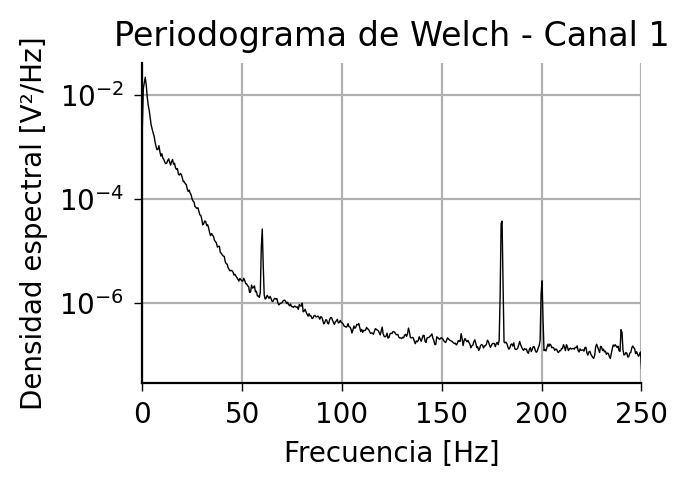

In [101]:
# Cargar la señal desde el archivo
datos = np.loadtxt('senal_filtros.txt')

# Extraer el canal 1 (primera columna)
canal1 = datos[:, 0]

# Definir la frecuencia de muestreo
Fs = 500  # Hz

# Calcular el periodograma de Welch
f, Pxx = signal.welch(canal1, fs=Fs, nperseg=1024)

# Graficar el espectro
plt.figure(figsize=(3.54, 2.54), dpi=200)

plt.semilogy(f, Pxx, color='black', linewidth=0.5)
plt.title('Periodograma de Welch - Canal 1')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral [V²/Hz]')
plt.grid(True)
plt.xlim(0, np.max(f))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='out', length=3, width=0.5)

plt.tight_layout()
plt.show()


#### Diseño del filtro.

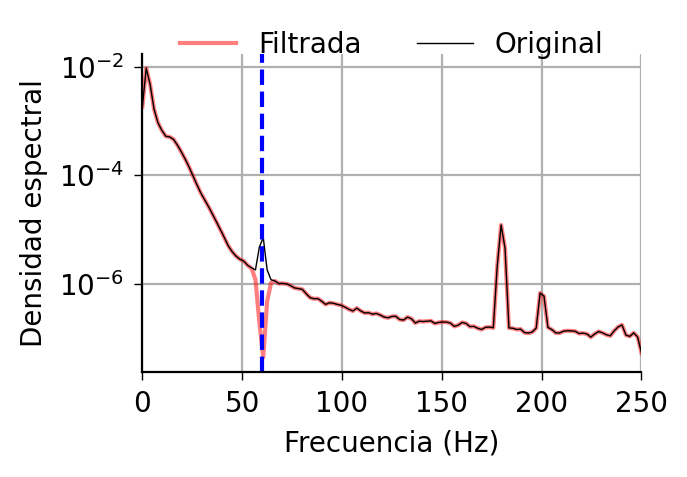

In [102]:
original = canal1.copy()

# Parámetros del filtro notch
Fs = 500
nyq = Fs / 2
low = 58 / nyq
high = 62 / nyq
order = 400

# Filtro notch FIR
filtro_notch = signal.firwin(order+1, [low, high], pass_zero='bandstop', window='hamming')
filtrada = signal.filtfilt(filtro_notch, 1, original)

f1, psd1 = signal.welch(original, fs=Fs)
f2, psd2 = signal.welch(filtrada, fs=Fs)

plt.figure(figsize=(3.54, 2.54), dpi=200)

plt.semilogy(f2, psd2, color='red', alpha=0.5)
plt.semilogy(f1, psd1, color='black', linewidth=0.5)

plt.axvline(60, color='blue', linestyle='--')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral')
plt.xlim(0, np.max(f1))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='out', length=3, width=0.5)

plt.legend(['Filtrada', 'Original'],
           loc='upper center',
           bbox_to_anchor=(0.5, 1.15),
           ncol=2, frameon=False)

plt.grid(True)
plt.tight_layout()
plt.show()

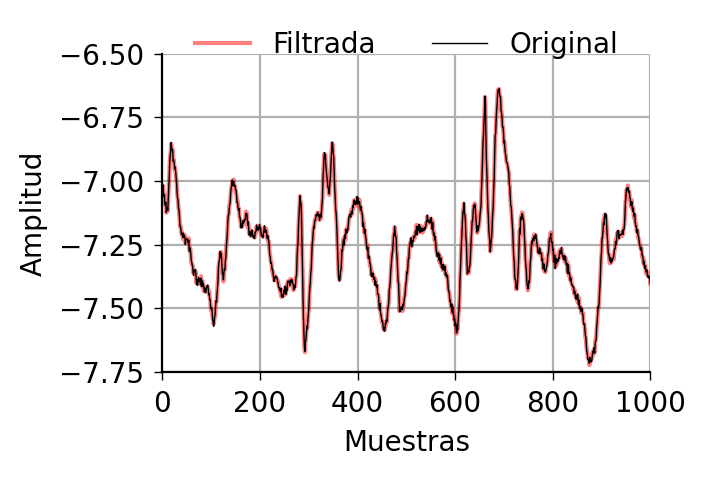

In [103]:
# Comparación visual
plt.figure(figsize=(3.54, 2.54), dpi=200)
plt.plot(filtrada, color='red', alpha=0.5)
plt.plot(original, color='black', linewidth=0.5)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.xlim(0, 1000)
plt.ylim(-7.75, -6.5)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='out', length=3, width=0.5)

plt.legend(['Filtrada', 'Original'], loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=2, frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()


Una vez cargada la señal del canal 1 y realizada la estimación de su densidad espectral de potencia mediante el método de Welch, se observaron componentes frecuenciales no esperadas en una señal biológica. En particular, destaca un pico mayor alrededor de los 60 Hz.  
Esta característica es típica del del ruido de la red electrica, que en muchos países como en Colombia es de 60 Hz. Este tipo de interferencia es ampliamente conocido en el procesamiento de señales biomédicas, especialmente en registros EEG y ECG [4]

Con el objetivo de eliminar este ruido, se diseñó un filtro FIR notch centrado en el rango de 58 a 62 Hz, empleando una ventana de Hamming y una orden del filtro de 400, se estimó este orden gracias a la ecúacion:
$$
\text{orden} = \frac{\Delta F}{\Delta f / F_s}
$$

Donde:

- $\Delta F = 3.3$ es un factor asociado a la ventana de Hamming
- $\Delta f = 4\,\text{Hz}$ es el ancho de la banda de rechazo (de 58 Hz a 62 Hz),
- $F_s = 500\,\text{Hz}$ es la frecuencia de muestreo.

Sustituyendo en la fórmula:

$$
\text{orden} = \frac{\Delta F}{\Delta f / F_s} = \frac{3.3}{4 / 500} = \frac{3.3 \cdot 500}{4} = 412.5
$$

El uso de un filtro de rechazo de banda tipo FIR con fase lineal (aplicado mediante `filtfilt`) garantiza que no se distorsione la forma de onda de la señal en el dominio temporal, lo cual es especialmente importante cuando se desea conservar la morfología original de las señales biológicas.[5]

Una vez aplicado el filtro, se volvió a calcular el periodograma de Welch. La comparación entre los espectros antes y después del filtrado,  muestra una atenuación del componente de 60 Hz, que prácticamente desaparece en la señal filtrada. Esta reducción clara de energía confirma la efectividad del filtro en la eliminación del ruido de red.

En cuanto al dominio del tiempo, la comparación entre la señal antes y después del filtrado se ve muy similar visualmente. Las dos señales se superponen casi perfectamente, y las diferencias son mínimas, localizadas probablemente en las oscilaciones de alta frecuencia asociadas al ruido eliminado. Esta superposición valida que el filtrado fue selectivo y no invasivo, actuó específicamente sobre el ruido en 60 Hz sin distorsionar la morfología de la señal.

## Conclusiones

- La diferencia entre `lfilter` y `filtfilt` fue notoria, en especial para el fitro IIR, siendo `filtfilt` la opción preferida cuando se desea eliminar el desfase sin alterar la forma general de la señal. Además, se verificó que no fue necesario ajustar el orden de los filtros en este caso, ya que ambos funcionaron correctamente con los valores propuestos inicialmente. Sin embargo, se deja abierta la posibilidad de explorar distintas órdenes para optimizar el equilibrio entre precisión y eficiencia computacional, pues debe tenerse en cuenta la diferencia en los ordenes reales del filtro para ambas funciones.

- Se destaca la importancia del análisis frecuencial para el desarrollo y evaluación de filtros, pues como se evidencia con el filtro notch, este ruido puede no evidenciarse a simple vista, tanto su presencia como eliminación, sin embargo, su presencia puede igualmente afectar posteriores procesamientos y análisis, por lo que se debe verificar siempre la presencia de picos de frecuencia anómalos y posteriormente su correcto filtrado.

## Referencias

[1] I. Grout, "Chapter 7 - Introduction to Digital Signal Processing," in *Digital Systems Design with FPGAs and CPLDs*, I. Grout, Ed., Oxford, UK: Newnes, 2008, pp. 475–536. doi: 10.1016/B978-0-7506-8397-5.00007-6.

[2] SciPy Developers, “scipy.signal.lfilter,” SciPy v1.16.0 documentation, SciPy, 2024. [Online]. Disponible en: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html. [Accedido: Jul. 07, 2025].

[3] SciPy Developers, “scipy.signal.filtfilt,” SciPy v1.16.0 documentation, SciPy, 2024. [Online]. Disponible en: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html. [Accedido: Jul. 07, 2025].

[4]Castañeda Cárdenas, J.  (2012).  Eliminación de perturbaciones en señales ECG utilizando filtrado de Kalman implementado en un DSP.    Pereira : Universidad Tecnológica de Pereira.  Disponible en: https://hdl.handle.net/11059/4686

[5]Malzate, D. (2014, mayo). Filtros, muestreo y modelo de señales [Trabajo de clase, Universidad Distrital Francisco José de Caldas]. Comunidad UDistrital. https://comunidad.udistrital.edu.co/malzate/files/2014/05/Filtros_muestreo_modelo.pdf
